## Getting Data

In [1]:
from movie_sentiment.processing.arcs import *

In [2]:
df = get_all_reshaped_arcs()
df.head(5)

Loading data from pickle file


,movie_name,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,Dark City,-0.264215,-0.252834,-0.247494,-0.250802,-0.174286,-0.185712,-0.206061,-0.240264,-0.239482,...,-0.079628,-0.041629,-0.008806,-0.038270,-0.052322,-0.053975,-0.122018,-0.165764,-0.207447,-0.231388
1,Slay the Dreamer IMDb,0.381371,0.312880,0.204171,0.148183,0.115888,0.157062,0.194365,0.236621,0.276336,...,-0.020072,-0.001115,-0.005655,0.014332,0.005550,0.039488,0.028356,-0.045779,-0.066817,-0.043838
2,The Deep End of the Ocean,0.296428,0.308639,0.291457,0.282200,0.258760,0.242423,0.241225,0.241334,0.248479,...,0.202632,0.179962,0.166736,0.131226,0.143964,0.171533,0.151181,0.152319,0.158022,0.153908
3,Salt,0.005828,-0.077033,-0.050079,-0.076800,-0.059653,-0.057766,-0.133402,-0.132843,-0.115389,...,-0.126525,-0.087293,0.004971,0.024041,-0.016748,-0.027757,-0.091890,-0.118072,-0.151592,-0.224275
4,The Truman Show,-0.055184,-0.084351,-0.046433,0.021261,0.078433,0.082956,0.078105,0.110182,0.102816,...,0.104466,0.159502,0.251378,0.312358,0.307167,0.220482,0.120524,0.048695,-0.008753,-0.012226


In [4]:
df.shape

(2771, 31)

## Standardize

In [6]:
from sklearn.preprocessing import StandardScaler

In [8]:
# variables
X = df.drop(columns='movie_name')
y = df['movie_name']
features = X.columns

In [22]:
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=features)
X.shape

(2771, 30)

## PCA

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [27]:
pca = PCA()
pca.fit(X)

# Access our 30 PCs
W = pca.components_

# Print PCs as COLUMNS
W = pd.DataFrame(W.T, columns=[f'PC{i}' for i in range(1, 31)])
W

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-0.154998,0.235168,0.186124,0.264459,-0.229201,-0.297809,-0.297535,-0.296301,0.289103,-0.195450,...,0.128665,-0.099530,0.120910,-0.089830,-0.057504,-0.060882,-0.030390,-0.052717,0.003184,0.024864
1,-0.160621,0.260895,0.192979,0.262401,-0.191468,-0.234339,-0.162989,-0.131907,0.052123,-0.024582,...,-0.278984,0.218973,-0.281231,0.203989,0.145640,0.200006,0.094234,0.132942,0.010849,-0.063924
2,-0.166915,0.280613,0.181352,0.220727,-0.112633,-0.108336,0.018746,0.093192,-0.198603,0.170282,...,0.217321,-0.177989,0.277973,-0.204689,-0.184514,-0.302769,-0.150629,-0.171977,-0.038228,0.109875
3,-0.172481,0.281603,0.160737,0.160275,-0.019995,0.046428,0.178293,0.240241,-0.264098,0.203129,...,0.035061,0.062719,-0.123128,0.131186,0.153301,0.324820,0.195625,0.198409,0.084171,-0.131405
4,-0.176092,0.280895,0.122629,0.082619,0.080109,0.164562,0.246362,0.215608,-0.154157,0.046380,...,-0.278688,0.088327,-0.058742,-0.014039,-0.064436,-0.279116,-0.214258,-0.225234,-0.155429,0.131646
5,-0.179672,0.267142,0.072903,-0.013062,0.162964,0.240031,0.217871,0.116589,0.059488,-0.104593,...,0.278106,-0.221421,0.177078,-0.126730,-0.042703,0.170335,0.234988,0.209061,0.210561,-0.149274
6,-0.182943,0.242325,0.015067,-0.106248,0.215001,0.240405,0.122850,-0.051893,0.201767,-0.239361,...,-0.001422,0.164989,-0.199689,0.213376,0.147654,-0.013479,-0.239981,-0.179035,-0.264633,0.159034
7,-0.184918,0.213171,-0.045085,-0.183047,0.237861,0.162099,-0.028473,-0.185711,0.220669,-0.175946,...,-0.277900,0.010374,0.094154,-0.179265,-0.217047,-0.162671,0.196609,0.126727,0.297989,-0.152284
8,-0.186152,0.177272,-0.110270,-0.236144,0.210368,0.049108,-0.163171,-0.223763,0.116283,0.041897,...,0.271249,-0.158370,0.086331,0.018180,0.235705,0.317093,-0.131375,-0.050369,-0.275031,0.140791
9,-0.187492,0.140579,-0.162545,-0.254635,0.143538,-0.074101,-0.214246,-0.150589,-0.051311,0.236966,...,0.010874,0.194797,-0.213590,0.175620,-0.166235,-0.347404,0.002287,0.016780,0.253371,-0.151712


In [28]:
X_proj = pca.transform(X)
X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, 31)])
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,6.270109,-3.034949,-0.243271,0.259495,0.472965,0.092347,1.022978,0.225385,0.289046,-0.180786,...,0.009608,-0.046982,0.022169,0.045386,-0.003606,-0.044028,-0.123673,-0.004561,-0.073641,0.047505
1,-0.732513,2.225891,0.107037,-0.412146,0.190818,-0.922609,-0.803151,-1.147755,0.385219,0.224170,...,-0.030341,0.004683,-0.021735,-0.040125,0.154137,-0.036353,-0.047056,0.121603,0.062188,-0.074881
2,-4.262657,0.599886,0.059322,0.353789,-0.285509,0.082915,-0.234360,-0.178010,-0.078145,0.117324,...,-0.012475,0.025505,-0.037404,-0.029018,-0.040882,0.099903,-0.057474,0.006840,-0.000429,0.000173
3,4.621081,-0.996738,0.638672,0.127824,0.295101,-0.653591,0.688546,-0.117684,0.270842,0.043830,...,0.046248,-0.359428,0.147939,-0.052426,-0.084255,0.031509,-0.058171,-0.047218,-0.047621,-0.072790
4,1.028247,-1.602936,2.067381,-1.522880,2.367764,-0.791430,0.568443,0.353284,0.317185,0.085734,...,-0.039292,-0.086323,0.107821,-0.045893,0.011202,0.046041,-0.041906,0.031235,-0.027711,0.051504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,-11.477445,-0.074386,-0.546331,-0.235537,0.282905,-0.167182,0.223692,-0.330355,0.180274,0.023109,...,0.093243,-0.090132,-0.109587,0.072746,-0.039096,0.087313,-0.089312,-0.046462,0.088141,0.008128
2767,-5.738979,-0.452700,-0.601522,-0.666182,-0.800448,0.182041,0.479150,0.120719,0.037681,-0.004082,...,0.088726,-0.112960,0.044098,-0.026112,0.086412,0.013696,0.008263,0.063245,0.016182,-0.017011
2768,-5.699027,2.899256,-2.109114,-0.186437,0.329902,0.298962,1.510507,0.369806,0.276585,0.490652,...,0.030915,0.124189,-0.199824,-0.155747,-0.122359,0.017572,-0.002253,0.098396,-0.099051,-0.117723
2769,-5.650004,-0.344209,-0.482583,-1.573783,0.163462,0.365421,0.400236,0.156042,-0.316930,0.224042,...,-0.019269,0.159078,0.033988,0.039172,0.042531,0.160922,0.021901,-0.078688,-0.122329,-0.019208


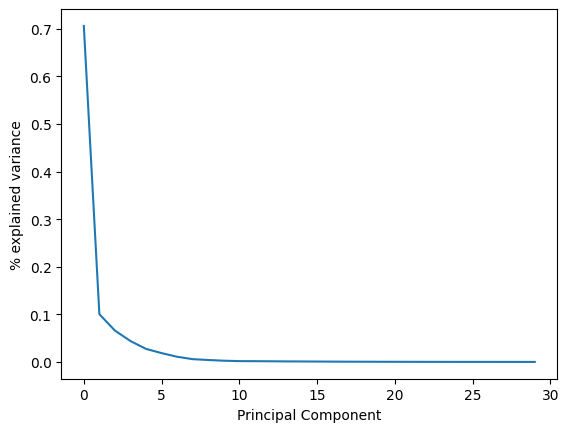

In [33]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

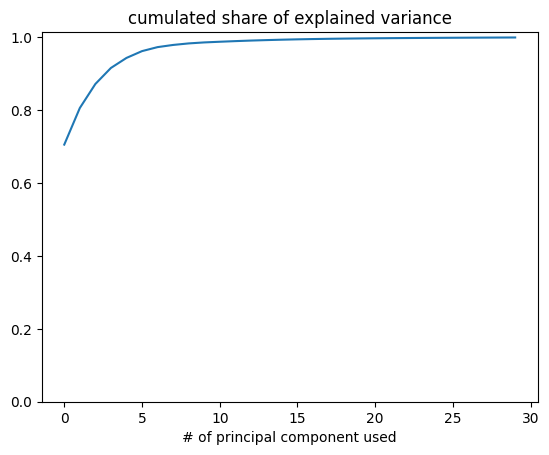

In [37]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

In [120]:
pca2 = PCA(n_components=5).fit(X)
X_proj2 = pd.DataFrame(pca2.fit_transform(X))
X_proj2

,0,1,2,3,4
0,6.270109,-3.034949,-0.243271,0.259495,0.472965
1,-0.732513,2.225891,0.107037,-0.412146,0.190819
2,-4.262657,0.599886,0.059322,0.353789,-0.285509
3,4.621081,-0.996738,0.638672,0.127824,0.295100
4,1.028247,-1.602936,2.067381,-1.522880,2.367764
...,...,...,...,...,...
2766,-11.477445,-0.074386,-0.546331,-0.235537,0.282905
2767,-5.738979,-0.452700,-0.601522,-0.666182,-0.800450
2768,-5.699027,2.899256,-2.109114,-0.186437,0.329903
2769,-5.650004,-0.344209,-0.482583,-1.573783,0.163463


## K_Means

In [58]:
from sklearn.cluster import KMeans
import math

In [43]:
km = KMeans(n_clusters=6)
km.fit(X_proj)

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [44]:
km.cluster_centers_.shape

(6, 30)

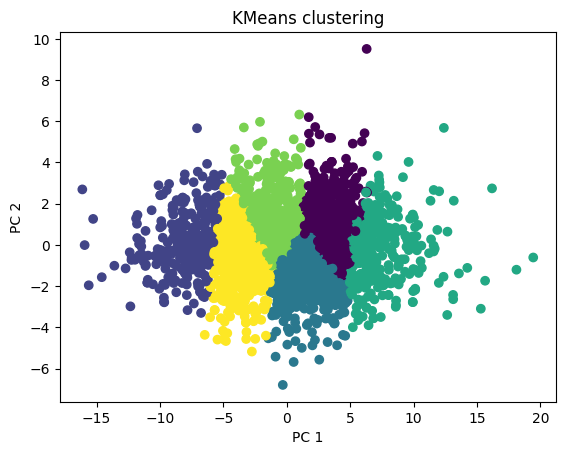

In [45]:
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=km.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2');

In [51]:
df_clusters = pd.DataFrame(km.cluster_centers_)

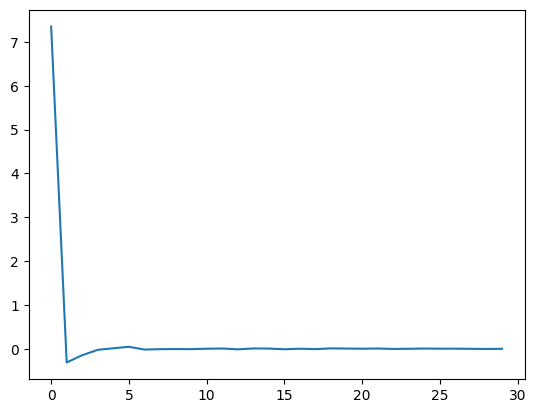

In [56]:
plt.plot(df_clusters.iloc[3])

In [121]:
def testing_kmeans(n):
    km = KMeans(n_clusters=n)
    km.fit(X_proj2)
    df_clusters = pd.DataFrame(pca2.inverse_transform(km.cluster_centers_))
    
    fig, axs = plt.subplots(round(n/4)+1,4, figsize=(20, 20))
    for i in range(0, n):
        rows = int(i/4)
        col = i%4
        axs[rows, col].plot(df_clusters.iloc[i])

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


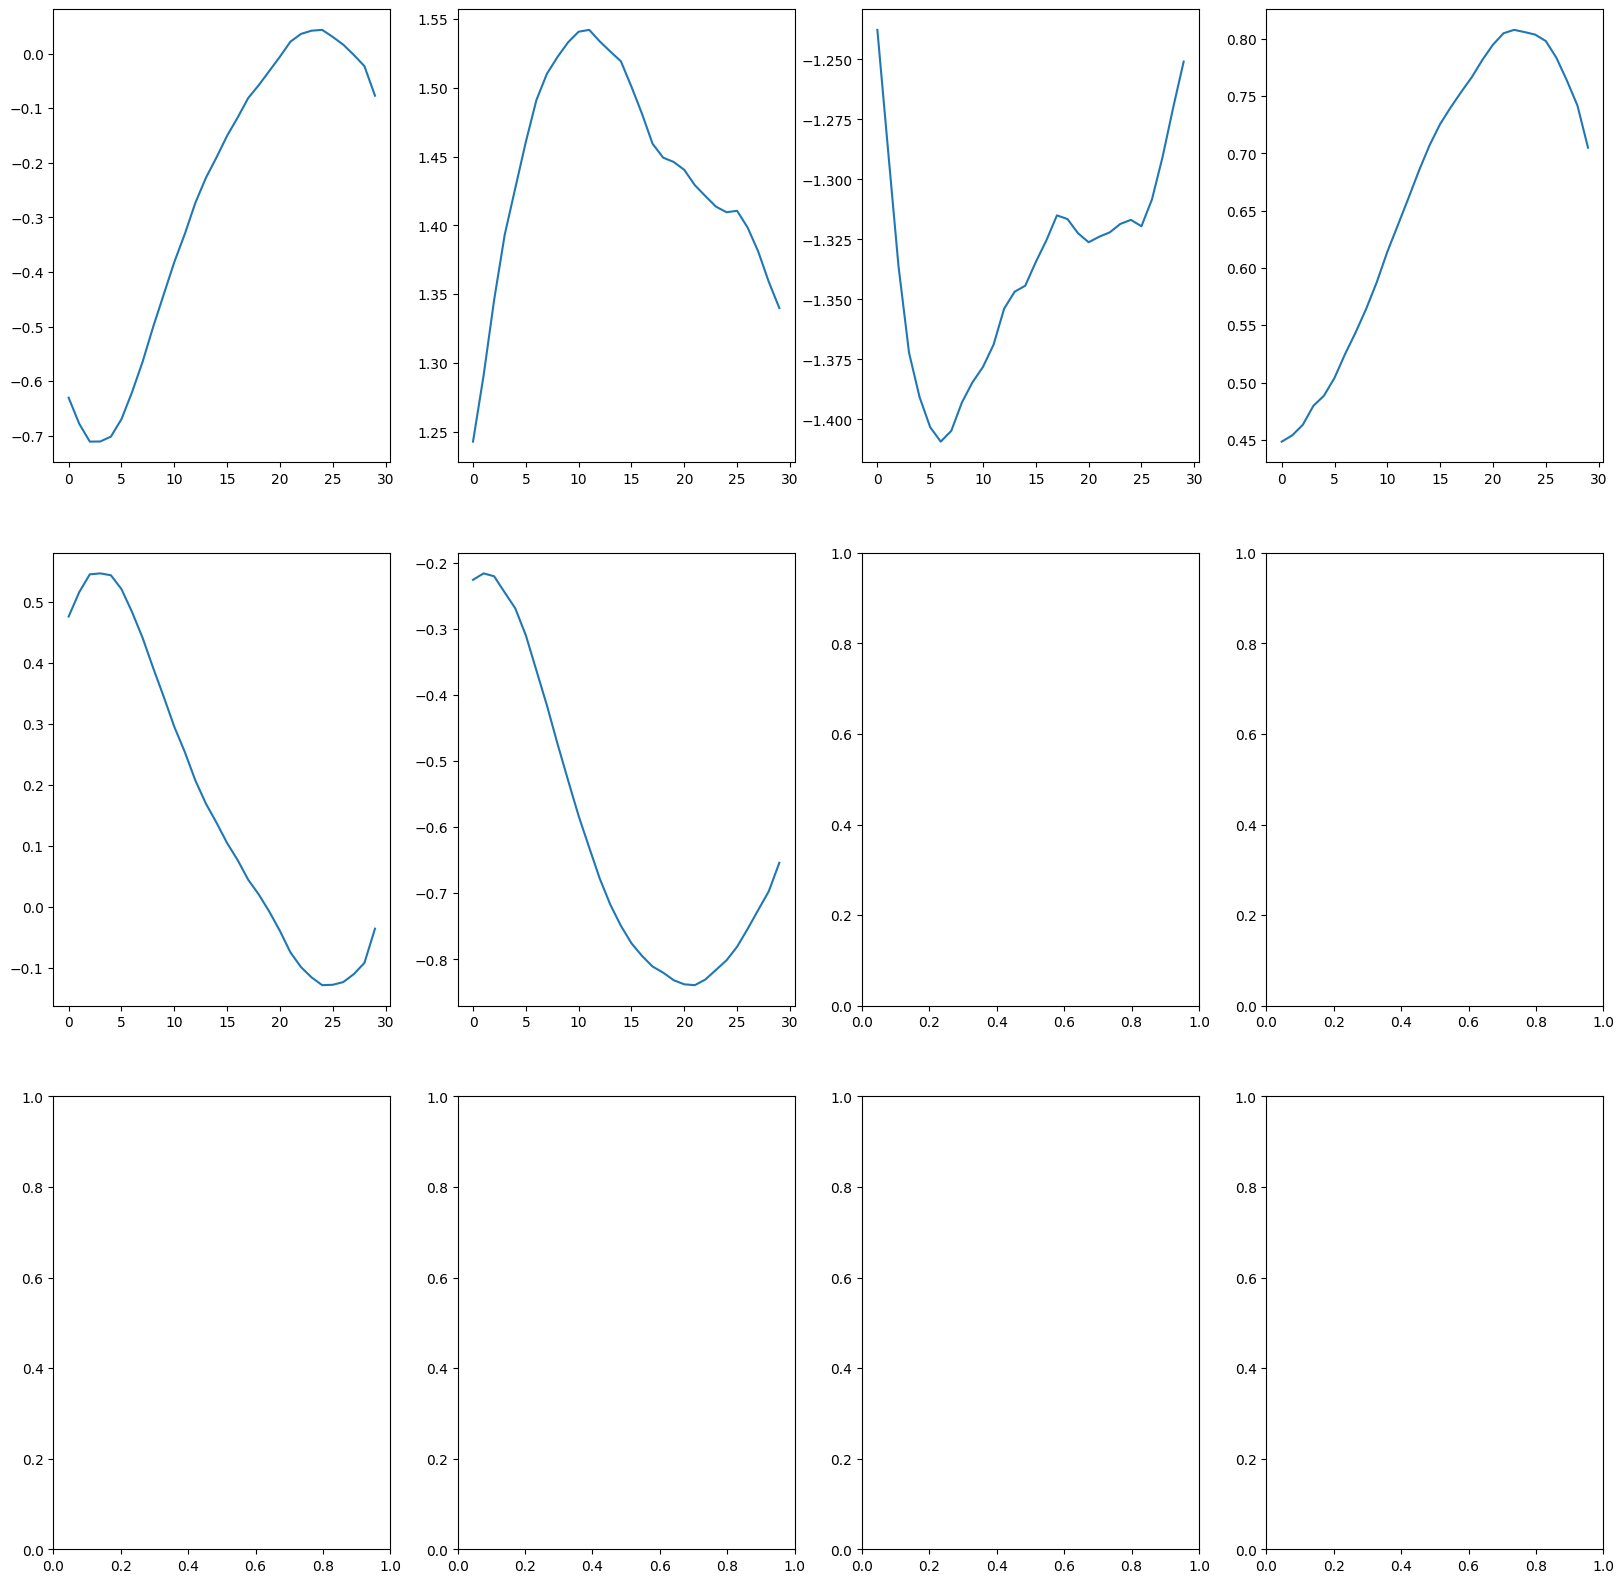

In [128]:
testing_kmeans(6)

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/sklearn/cluster/_

Text(0.5, 0, 'k cluster number')

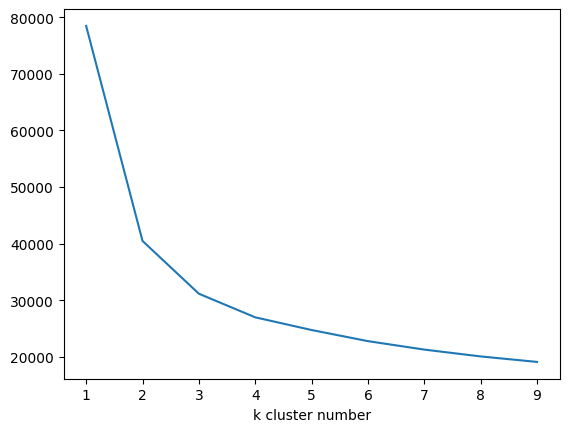

In [129]:
inertias = []
ks = range(1,10)
for k in ks:
    km_test = KMeans(n_clusters=k).fit(X_proj2)
    inertias.append(km_test.inertia_)
plt.plot(ks, inertias)
plt.xlabel('k cluster number')